<a href="https://colab.research.google.com/github/JJuwan/2025-1-myclass-BDA/blob/main/inclass/09w_B_wed_0430_easy_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 9주차 수업

## 결측값 제거하기

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.DataFrame({'sex' : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, None]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [142]:
df.dropna()

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [143]:
df.dropna(axis=0)

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [144]:
df.dropna(axis=1)

""
0
1
2
3
4


In [145]:
df.dropna(subset = ['score'])

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [146]:
df.dropna(subset = ['score'], axis=1)

KeyError: ['score']

In [147]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [148]:
df_nomiss['score'] + 1

,score
0,6.0
1,5.0
2,4.0
3,5.0


In [149]:
df_nomiss = df.dropna(subset = ['score', 'sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


In [150]:
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [151]:
df.score.mean()

np.float64(4.0)

In [152]:
df['score'].sum()

np.float64(16.0)

In [153]:
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


In [154]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [155]:
df.isna()

,name,toy,born
0,False,True,True
1,False,False,False
2,False,False,True


In [156]:
df.dropna()

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [157]:
df.dropna(axis=1)

,name
0,Alfred
1,Batman
2,Catwoman


In [158]:
df.dropna(axis='columns')

,name
0,Alfred
1,Batman
2,Catwoman


In [159]:
df.dropna(how='any')

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [160]:
df.dropna(how='all')

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [161]:
df.dropna(thresh=2)

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [162]:
df.dropna(thresh=1)

,name,toy,born
0,Alfred,NaN,NaT
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [163]:
df.dropna(thresh=3)

,name,toy,born
1,Batman,Batmobile,1940-04-25


In [164]:
df.dropna(subset = ['name', 'toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [165]:
df.dropna(subset = ['toy'])

,name,toy,born
1,Batman,Batmobile,1940-04-25
2,Catwoman,Bullwhip,NaT


In [166]:
df.dropna(subset = ['born'])

,name,toy,born
1,Batman,Batmobile,1940-04-25


## 빈 데이터프레임 확인 방법

In [167]:
df1 = pd.DataFrame(index = ['row', 'row2', 'row3'])
df1

""
row
row2
row3


In [168]:
df1.empty

True

In [169]:
df2 = pd.DataFrame(columns = ['col1', 'col2', 'col3'])
df2

,col1,col2,col3


In [170]:
df2.empty

True

In [171]:
df3 = pd.DataFrame(index = ['row', 'row2', 'row3'], columns = ['col1', 'col2', 'col3'])
df3

,col1,col2,col3
row,NaN,NaN,NaN
row2,NaN,NaN,NaN
row3,NaN,NaN,NaN


In [172]:
df3.empty

False

In [173]:
df5 = pd.DataFrame(2,
                   index = ['row', 'row2', 'row3'],
                   columns = ['col1', 'col2', 'col3'])
df5

,col1,col2,col3
row,2,2,2
row2,2,2,2
row3,2,2,2


In [174]:
df5.empty

False

## 결측값 예측

In [175]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [176]:
exam = pd.read_csv('data/exam.csv')
exam.loc[[2, 7, 14], ['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [177]:
exam.loc[[2, 7, 14], ['math']]

,math
2,NaN
7,NaN
14,NaN


In [178]:
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


## 결측값 채워넣기 fillna()

In [181]:
exam['math'] = exam['math'].fillna(100)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,100.0,86,78
7,8,2,100.0,78,25
14,15,4,100.0,56,78


In [182]:
exam.loc[[2, 7, 14], ['math']] = np.nan
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,NaN,86,78
7,8,2,NaN,78,25
14,15,4,NaN,56,78


In [183]:
exam['math'] = exam['math'].fillna(exam['math'].mean())
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.235294,86,78
7,8,2,55.235294,78,25
14,15,4,55.235294,56,78


In [184]:
pd.set_option('display.precision', 2)
exam.loc[[2, 7, 14]]

,id,nclass,math,english,science
2,3,1,55.24,86,78
7,8,2,55.24,78,25
14,15,4,55.24,56,78


In [185]:
exam.math.isna().sum()

np.int64(0)

In [186]:
df = pd.DataFrame({'sex' : [1, 2, 1, 3, 2, 1],
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [187]:
df['sex'].value_counts()

,count
sex,
1,3
2,2
3,1


In [188]:
df['sex'].value_counts().sort_index()

,count
sex,
1,3
2,2
3,1


In [189]:
df['sex'].value_counts().sort_values()

,count
sex,
3,1
2,2
1,3


In [190]:
df['score'].value_counts().sort_index()

,count
score,
2,1
3,1
4,2
5,1
6,1


In [191]:
df['score'].value_counts().sort_values()

,count
score,
5,1
3,1
2,1
6,1
4,2


In [192]:
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [193]:
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [194]:
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [195]:
df.groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [196]:
df.dropna(subset = ['sex', 'score'])

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
4,2.0,2.0


In [197]:
df.dropna(subset = ['sex', 'score']).groupby('sex').agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [198]:
df = pd.DataFrame([1])
df

,0
0,1


In [199]:
df = pd.DataFrame([1, 1, 2, 2])
df

,0
0,1
1,1
2,2
3,2


In [201]:
df = pd.DataFrame([[1, 1, 2, 2]])
df

,0,1,2,3
0,1,1,2,2


In [203]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 10, np.nan)
df

,x1,x2
0,1,10.0
1,1,10.0
2,2,NaN
3,2,NaN


In [204]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [206]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', None)
df

,x1,x2
0,1,a
1,1,a
2,2,None
3,2,None


In [208]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      2 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [211]:
df = pd.DataFrame({'x1': [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')
df

,x1,x2
0,1,a
1,1,a
2,2,etc
3,2,etc


In [212]:
df['x2'] = df['x2'].replace('etc', np.nan)
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [213]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [214]:
df = df.fillna(10)
df

,x1,x2
0,1,a
1,1,a
2,2,10
3,2,10


In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x1      4 non-null      int64 
 1   x2      4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [216]:
type(df.loc[2, 'x2'])

int

In [217]:
type(df.loc[0, 'x2'])

str

## 이상값(outlier) 알아보기

In [218]:
mpg = pd.read_csv('data/mpg.csv')
mpg.sample(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
119,hyundai,tiburon,2.7,2008,6,auto(l4),f,17,24,r,subcompact
120,hyundai,tiburon,2.7,2008,6,manual(m6),f,16,24,r,subcompact
36,chevrolet,malibu,3.6,2008,6,auto(s6),f,17,26,r,midsize
225,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact
150,nissan,pathfinder 4wd,3.3,1999,6,auto(l4),4,14,17,r,suv


In [225]:
%config InlineBackend.figure_format = 'retina'

In [226]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


<Axes: ylabel='hwy'>

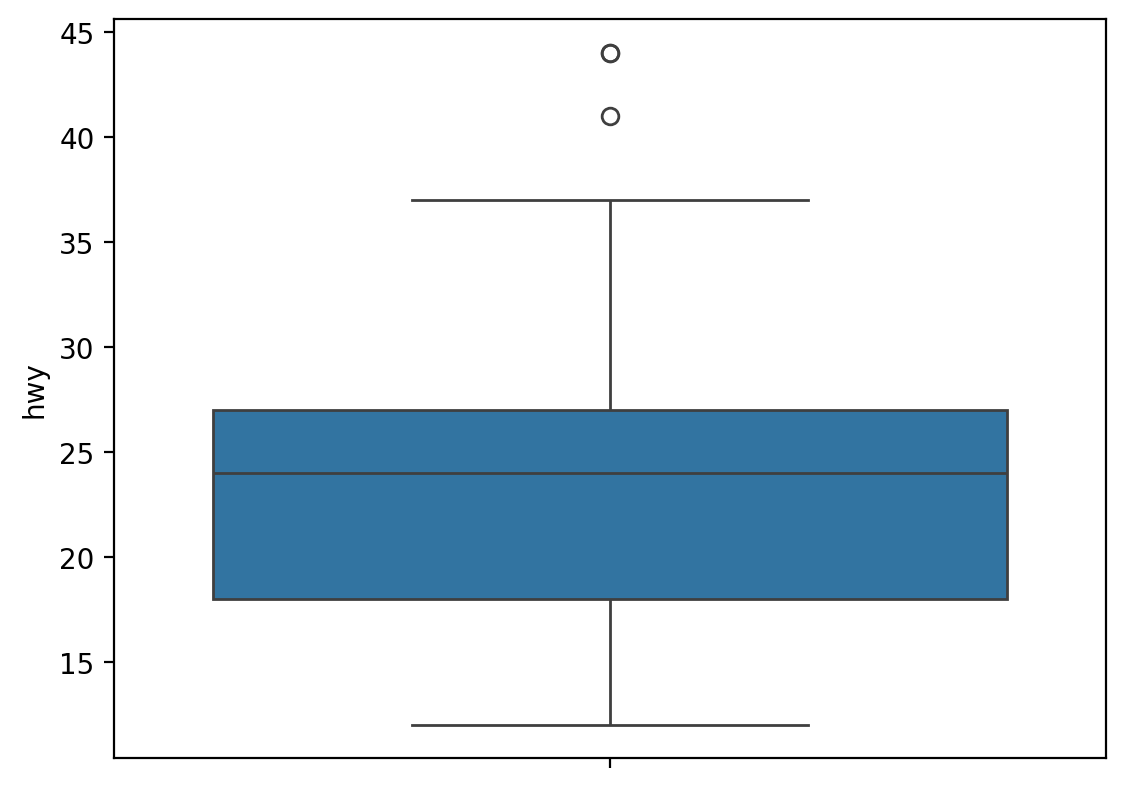

In [227]:
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [228]:
s = pd.Series([1, 2, 3, 4, 5])
s

,0
0,1
1,2
2,3
3,4
4,5


In [229]:
s.quantile()

np.float64(3.0)

In [231]:
mpg.hwy.quantile([.25, .5, .75])

,hwy
0.25,18.0
0.50,24.0
0.75,27.0


In [232]:
a, b = [10, 20]

In [233]:
a

10

In [234]:
b

20

In [235]:
p25, p50, p75 = mpg.hwy.quantile([.25, .5, .75])

In [236]:
p25

18.0

In [237]:
p50

24.0

In [238]:
p75

27.0

In [251]:
iqr = p75 - p25
iqr

9.0

In [252]:
uf = p25 - 1.5 * iqr
uf

4.5

In [253]:
## lower fence
lf = p25 - 1.5 * iqr
lf

4.5

In [240]:
mpg.hwy.describe()

,hwy
count,234.00
mean,23.44
std,5.95
min,12.00
25%,18.00
50%,24.00
75%,27.00
max,44.00


In [241]:
mpg.hwy.describe()['50%']

np.float64(24.0)

In [254]:
mpg[ mpg.hwy > uf ][['hwy']]

,hwy
0,29
1,29
2,31
3,30
4,26
...,...
229,28
230,29
231,26
232,26


In [255]:
mpg[ mpg.hwy < lf ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [249]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [250]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [262]:
mpg[ (mpg['hwy'] = np.where((mpg.hwy < LF) | (mpg.hwy > UF), np.nan, mpg))]

SyntaxError: cannot assign to subscript here. Maybe you meant '==' instead of '='? (<ipython-input-262-b90ba2a6201b>, line 1)

In [256]:
mpg[ mpg.hwy.isna() ]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category


In [257]:
len(mpg)

234

In [260]:
dmpg = mpg.dropna(subset=['hwy'])
len(dmpg)

234

In [261]:
dmpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [264]:
mpg = pd.read_csv('data/mpg.csv')
mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [265]:
mpg[ (mpg['hwy'] < LF) | (mpg['hwy'] > UF) ]

NameError: name 'LF' is not defined

## 7장 종료